# Setting up

## Mounting Drive

In [1]:
from google.colab import drive

In [2]:
drive.flush_and_unmount()

In [3]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
ls

gdrive/  sample_data/


In [5]:
cd gdrive/'My Drive'/'EBIO5460_sewage_metagenomics'/'Group 2: Temporal'/ 

/content/gdrive/.shortcut-targets-by-id/1XYCCvnClFVxMp4IpwPbhaXS2oawJcGmc/EBIO5460_sewage_metagenomics/Group 2: Temporal


In [6]:
ls

 alldists.csv                      Metadata-plots.ipynb
 bray_curt_dist_m.lsmat            Metadata-plots.pdf
 Figures/                          MetaData.tsv
"John's-analysis-notebook.ipynb"   Notes_and_to-dos/
 melted_alldists.csv               prelim-results.gslides
 MetaData2.csv                    'QIIME files'/
 MetaData2.txt                     temporalworkflow.R
 MetaData.csv


## Packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [8]:
!pip install scikit-bio

In [9]:
from skbio import diversity

## Loading data

In [10]:
cd /content/gdrive/'My Drive'/EBIO5460_sewage_metagenomics/Sewage_shotgun_data/01_taxonomic_data/'01_Filtered_NTU_table_Spatial&Temporal_groups'/

/content/gdrive/.shortcut-targets-by-id/1XYCCvnClFVxMp4IpwPbhaXS2oawJcGmc/EBIO5460_sewage_metagenomics/Sewage_shotgun_data/01_taxonomic_data/01_Filtered_NTU_table_Spatial&Temporal_groups


In [11]:
data = pd.read_csv('2020_10_28-Sewer_NTU_table_bacteria_formatted.txt', sep='\t')

In [12]:
cd /content/gdrive/'My Drive'/'EBIO5460_sewage_metagenomics'/'Group 2: Temporal'/ 

/content/gdrive/.shortcut-targets-by-id/1XYCCvnClFVxMp4IpwPbhaXS2oawJcGmc/EBIO5460_sewage_metagenomics/Group 2: Temporal


In [13]:
metadata = pd.read_csv('MetaData2.csv')

## Cleaning data

In [14]:
data.head()

,#Formatted for mctoolsr,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189
0,#NTU_ID,BAK_1,BAK_10,BAK_12,BAK_13,BAK_15,BAK_17,BAK_19,BAK_20,BAK_3,BAK_6,BAK_8,BAS_1,BAS_10,BAS_12,BAS_13,BAS_15,BAS_17,BAS_19,BAS_20,BAS_3,BAS_5,BAS_6,BAS_8,BRA_1,BRA_10,BRA_12,BRA_13,BRA_15,BRA_17,BRA_19,BRA_20,BRA_3,BRA_5,BRA_6,BRA_8,CHE_1,CHE_10,CHE_12,CHE_13,...,SEW_20,SEW_5,SEW_6,SEW_8,STE_1,STE_10,STE_12,STE_13,STE_15,STE_17,STE_19,STE_20,STE_3,STE_5,STE_6,STE_8,WEB_1,WEB_10,WEB_12,WEB_13,WEB_15,WEB_17,WEB_19,WEB_20,WEB_3,WEB_5,WEB_6,WEB_8,WIL_10,WIL_12,WIL_13,WIL_15,WIL_17,WIL_19,WIL_20,WIL_3,WIL_5,WIL_6,WIL_8,taxonomy
1,NTU_1,0.127758982,0.06460396,0.077020639,0.058266972,0.080519829,0.086336697,0.059212818,0.080318711,0.088165987,0.047327899,0.058685587,0.087199553,0.054074768,0.070361595,0.09036604,0.118159896,0.072117681,0.07023356,0.08723147,0.046799683,0.067725901,0.066278595,0.04686165,0.014582193,0.030797485,0.080347774,0.031061693,0.078273959,0.073092603,0.062669135,0.070934001,0.031583129,0.03283564,0.038998907,0.138841079,0.068625301,0.109629727,0.180856259,0.111355816,...,0.157098659,0.202855403,0.127312682,0.103185247,0.120213964,0.041606887,0.028918206,0.072219855,0.092047772,0.067589475,0.074411048,0.082073434,0.21258696,0.101979692,0.110159723,0.054618117,0.044383057,0.024670532,0.012880429,0.05284208,0.058738842,0.033859576,0.029407938,0.059125189,0.026495079,0.022450181,0.059429623,0.040661468,0.048390942,0.096709201,0.132674968,0.098094003,0.139133166,0.152168301,0.107359728,0.131047073,0.087963885,0.063637992,0.095172213,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
2,NTU_2,0.064282262,0.09269802,0.065951804,0.125601198,0.102224009,0.070959475,0.051549983,0.106328418,0.027875165,0.065330616,0.036858878,0.101670704,0.097249425,0.134336046,0.179079817,0.198571694,0.130384946,0.128540666,0.18999349,0.04014888,0.045357713,0.057495915,0.044495564,0.030109989,0.056367875,0.195772748,0.056671449,0.11674193,0.034556397,0.069933058,0.054065999,0.047209164,0.026037873,0.031162678,0.060404885,0.020828766,0.028050954,0.059173042,0.116173434,...,0.081012948,0.037214967,0.021974906,0.061190277,0.095861486,0.027170014,0.026174142,0.107158074,0.098456161,0.059982541,0.083346872,0.096472282,0.117861188,0.042296735,0.065865305,0.049511545,0.081952118,0.037849236,0.034879745,0.118652285,0.114022459,0.088388035,0.079245283,0.131523379,0.043401464,0.030522156,0.046550138,0.041080119,0.055423123,0.031676741,0.097788751,0.092805109,0.09830402,0.089442437,0.148894826,0.056461077,0.031799774,0.027580443,0.040559237,Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
3,NTU_4,0.0353633,0.036757426,0.02911334,0.035953639,0.065648446,0.172993753,0.0651341,0.102481912,0.10833956,0.029098732,0.349888762,0.029936029,0.050668483,0.018337282,0.070920183,0.019847895,0.045849651,0.045386782,0.025109272,0.098663738,0.08778626,0.168607026,0.118435754,0.019359976,0.012997104,0.029081097,0.091104735,0.021910018,0.09774801,0.042728956,0.086918091,0.225451897,0.116897305,0.161219779,0.093434964,0.082364978,0.018282622,0.023929676,0.004817619,...,

In [15]:
data.iloc[0][0] = 'SampleID'

In [16]:
data.columns = data.iloc[0]
data.set_index('SampleID',inplace=True)
data.drop('SampleID', inplace=True)

In [17]:
data = data.transpose()

In [18]:
data.head()

SampleID,NTU_1,NTU_2,NTU_4,NTU_11,NTU_14,NTU_61,NTU_8,NTU_13,NTU_5,NTU_3,NTU_18,NTU_22,NTU_53,NTU_10,NTU_32,NTU_16,NTU_6,NTU_35,NTU_28,NTU_100,NTU_102,NTU_109,NTU_25,NTU_9,NTU_86,NTU_23,NTU_17,NTU_29,NTU_742,NTU_24,NTU_967,NTU_7,NTU_69,NTU_19,NTU_36,NTU_15,NTU_48,NTU_41,NTU_20,NTU_44,...,NTU_2381,NTU_1457,NTU_931,NTU_1573,NTU_1324,NTU_662,NTU_282,NTU_1586,NTU_892,NTU_1902,NTU_1179,NTU_890,NTU_676,NTU_1129,NTU_911,NTU_1183,NTU_1403,NTU_1063,NTU_1266,NTU_1170,NTU_1498,NTU_1685,NTU_1176,NTU_1201,NTU_1327,NTU_502,NTU_935,NTU_1147,NTU_1414,NTU_660,NTU_1189,NTU_1230,NTU_2275,NTU_1081,NTU_1140,NTU_702,NTU_1842,NTU_1123,NTU_1161,NTU_1557
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAK_1,0.127758982,0.064282262,0.0353633,0.021185758,0.019896891,0.002577735,0.031093926,0.020541324,0.034557757,0.041002094,0.013855325,0.01127759,0.003383277,0.023602384,0.007410988,0.015627517,0.034557757,0.006686,0.008860963,0.001127759,0.001047205,0.000966651,0.009827614,0.024005155,0.001449976,0.010149831,0.01433865,0.008780409,0,0.009908168,0,0.033027227,0.002416626,0.013694216,0.006363783,0.017238602,0.003786048,0.005638795,0.012969228,0.004913807,...,0,0,0,0,0,0,0.000161108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_10,0.06460396,0.09269802,0.036757426,0.009529703,0.073019802,0.094925743,0.022029703,0.053217822,0.013118812,0.011138614,0.00730198,0.006559406,0.036881188,0.004207921,0.008415842,0.031188119,0.021163366,0.004579208,0.004826733,0.005816832,0.009034653,0.002227723,0.008168317,0.016707921,0.002722772,0.00990099,0.015965347,0.015717822,0,0.004826733,0,0.004950495,0.001732673,0.005569307,0.003217822,0.006930693,0.007920792,0.004084158,0.00470297,0.002722772,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000123762,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_12,0.077020639,0.065951804,0.02911334,0.00334371,0.060302087,0.076040586,0.014008993,0.043064684,0.018390407,0.00980053,0.004266113,0.004900265,0.026864983,0.005880318,0.006053269,0.05494062,0.023060071,0.004554364,0.004323763,0.002248357,0.008301626,0.000691802,0.008993428,0.026576732,0.004266113,0.008532226,0.017352704,0.010895884,0,0.005130866,0,0.013836043,0.002940159,0.017468004,0.004208463,0.008820477,0.008705177,0.004208463,0.008762827,0.003516661,...,0,0,0,0,0,5.76502E-05,0,0,0,0,0,0,5.76502E-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.76502E-05,0,0,0,0,0,5.76502E-05,0,0,0,0
BAK_13,0.058266972,0.125601198,0.035953639,0.0293306,0.000788457,0.018765276,0.009855712,0.018765276,0.097295593,0.118268548,0.032878656,0.025782544,0.002365371,0.062603485,0.004494205,0.000709611,0.010565324,0.003153828,0.023338327,0,0.004651896,0.000473074,0.05188047,0.003626902,0.000236537,0.001971142,0.003153828,0.011984546,7.88457E-05,0.013324923,0,0.003548056,0.000315383,0.001340377,0.008594181,0.005913427,0.004415359,0.009698021,0.002365371,0.004021131,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000157691,0,0,0,0
BAK_15,0.080519829,0.102224009,0.065648446,0.008038585,0.008038585,0.005359057,0.016747053,0.015139335,0.055332262,0.100348339,0.027063237,0.015273312,0.005493033,0.048499464,0.008306538,0.004153269,0.021168274,0.005894962,0.017416935,0.000401929,0,0.000937835,0.030144695,0.014067524,0.007368703,0.00710075,0.008172562,0.012593783,0,0.009914255,0,0.01085209,0.000669882,0.007904609,0.007636656,0.012057878,0.003349411,0.007770632,0.009512326,0.004287245,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000133976,0,0,0,0


In [19]:
metadata.head()

,SampleID,Date,Weekend_Weekday,Location,sample_pH,SewerDepth_ft,TSS (g/L),sewer_age,sewer_material,dormitory,resident_population_equivalents,sample_volume_L,cockroach_infestation,SARS_CoV_2_detectable,Latitude,Longitude,TotalReadCount,Day,Week,DaysSince,LowTemp,HighTemp,Precip,PM25,AQI
0,BAK_1,1-Sep,Weekday,Baker,9.24,5.0,0.1108,NaN,CONCRETE,BAKER,378,10.3,NO,N,40.006749,-105.267465,11806786,Tuesday,Week 1,0,48,82,0.13,NaN,NaN
1,BAK_10,10-Sep,Weekday,Baker,8.60,5.0,0.0318,NaN,CONCRETE,BAKER,378,9.1,NO,Y,40.006749,-105.267465,8450195,Thursday,Week 2,9,35,49,0.02,7.0,29.0
2,BAK_12,12-Sep,Weekend,Baker,7.93,5.0,0.0460,NaN,CONCRETE,BAKER,378,7.4,NO,Y,40.006749,-105.267465,17351105,Saturday,Week 2,11,44,81,0.00,6.0,27.0
3,BAK_13,13-Sep,Weekend,Baker,9.10,5.0,0.0520,NaN,CONCRETE,BAKER,378,11.5,NO,Y,40.006749,-105.267465,12431432,Sunday,Week 2,12,45,85,0.00,5.0,19.0
4,BAK_15,15-Sep,Weekday,Baker,7.68,5.0,0.0462,NaN,CONCRETE,BAKER,378,11.6,NO,Y,40.006749,-105.267465,7258218,Tuesday,Week 3,14,52,88,0.00,9.0,35.0


In [20]:
metadata.set_index('SampleID',inplace=True)

In [21]:
excluded = [] 
for sample in data.index:
  if sample not in metadata.index:
    print(sample)
    excluded.append(sample)

HAL_10
HAL_12
HAL_13
HAL_15
HAL_17
HAL_20
REG_12
REG_13
REG_15
REG_17
REG_19
REG_20
REG_5
REG_6
REG_8
taxonomy


In [22]:
data.drop(labels=excluded[:-1],inplace=True)
print(data.shape)
print(metadata.shape)

(174, 1087)
(173, 24)


In [23]:
data_notax = data.drop('taxonomy')

# Longitudinal analysis

In [24]:
braycurt_dm = diversity.beta_diversity('braycurtis', counts=data_notax,ids=data_notax.index)

In [25]:
braycurt_df = braycurt_dm.to_data_frame()

In [26]:
braycurt_df.head()

,BAK_1,BAK_10,BAK_12,BAK_13,BAK_15,BAK_17,BAK_19,BAK_20,BAK_3,BAK_6,BAK_8,BAS_1,BAS_10,BAS_12,BAS_13,BAS_15,BAS_17,BAS_19,BAS_20,BAS_3,BAS_5,BAS_6,BAS_8,BRA_1,BRA_10,BRA_12,BRA_13,BRA_15,BRA_17,BRA_19,BRA_20,BRA_3,BRA_5,BRA_6,BRA_8,CHE_1,CHE_10,CHE_12,CHE_13,CHE_15,...,SEW_19,SEW_20,SEW_5,SEW_6,SEW_8,STE_1,STE_10,STE_12,STE_13,STE_15,STE_17,STE_19,STE_20,STE_3,STE_5,STE_6,STE_8,WEB_1,WEB_10,WEB_12,WEB_13,WEB_15,WEB_17,WEB_19,WEB_20,WEB_3,WEB_5,WEB_6,WEB_8,WIL_10,WIL_12,WIL_13,WIL_15,WIL_17,WIL_19,WIL_20,WIL_3,WIL_5,WIL_6,WIL_8
BAK_1,0.000000,0.407111,0.341110,0.455063,0.300381,0.362968,0.479392,0.384711,0.457402,0.439809,0.545433,0.429931,0.528565,0.455529,0.475913,0.453534,0.495222,0.509197,0.418251,0.663258,0.586920,0.505540,0.631647,0.650140,0.545218,0.374385,0.606083,0.422815,0.586207,0.508202,0.451054,0.550958,0.623253,0.622672,0.475709,0.445717,0.373194,0.313617,0.357473,0.276405,...,0.415784,0.425240,0.409165,0.535451,0.451573,0.416228,0.581428,0.608256,0.402173,0.406613,0.486379,0.457216,0.393887,0.397127,0.485583,0.408229,0.512184,0.476160,0.594279,0.607914,0.477300,0.518552,0.546028,0.542841,0.470203,0.640467,0.664877,0.514040,0.560599,0.476487,0.453799,0.445904,0.402789,0.357910,0.452371,0.468819,0.535074,0.489818,0.466368,0.464068
BAK_10,0.407111,0.000000,0.186696,0.518187,0.423194,0.316260,0.393836,0.242089,0.488889,0.230865,0.545386,0.436037,0.292144,0.331473,0.482339,0.535060,0.427422,0.407602,0.464188,0.540766,0.474314,0.480849,0.507613,0.718514,0.371020,0.376738,0.492330,0.527333,0.499413,0.349585,0.274651,0.587528,0.533051,0.487825,0.407786,0.532611,0.221816,0.370285,0.280541,0.456490,...,0.445840,0.522210,0.459216,0.478788,0.435881,0.363010,0.374218,0.373919,0.305798,0.365081,0.309754,0.269675,0.294517,0.424328,0.354186,0.287192,0.366624,0.530353,0.409255,0.379806,0.459093,0.473334,0.425107,0.440104,0.536031,0.563015,0.526771,0.469229,0.468915,0.257045,0.391326,0.456049,0.521021,0.407851,0.421206,0.433081,0.560911,0.520999,0.396255,0.517412
BAK_12,0.341110,0.186696,0.000000,0.547214,0.410191,0.328624,0.440139,0.275147,0.501852,0.277325,0.579595,0.437093,0.392894,0.371194,0.519220,0.551403,0.486606,0.468444,0.488498,0.580757,0.506977,0.515344,0.549467,0.717248,0.381664,0.377839,0.531712,0.546437,0.536034,0.391367,0.278668,0.621253,0.565382,0.527142,0.436674,0.541593,0.238200,0.342435,0.315657,0.432298,...,0.436772,0.526109,0.483250,0.506353,0.448796,0.389166,0.383331,0.397297,0.329744,0.359985,0.312824,0.294994,0.296044,0.459433,0.384024,0.323637,0.394120,0.550243,0.453850,0.445368,0.509588,0.518893,0.478849,0.489905,0.573488,0.604798,0.567878,0.513984,0.496309,0.296262,0.415687,0.486347,0.541515,0.426509,0.466876,0.458535,0.581493,0.546228,0.425329,0.541497
BAK_13,0.455063,0.518187,0.547214,0.000000,0.255094,0.502857,0.544984,0.461719,0.492587,0.529534,0.504346,0.514928,0.575796,0.508282,0.473726,0.528392,0.529352,0.526622,0.434525,0.703436,0.634195,0.523752,0.659947,0.622258,0.650612,0.510079,0.644832,0.347758,0.660570,0.612434,0.588152,0.515417,0.646243,0.645507,0.581561,0.319585,0.583767,0.535433,0.488051,0.455670,...,0.571131,0.576746,0.471645,0.638161,0.529897,0.539197,0.700034,0.721767,0.567100,0.622222,0.671775,0.604630,0.579610,0.488742,0.632092,0.565672,0.618627,0.515719,0.683706,0.686110,0.433687,0.531602,0.602811,0.597146,0.427274,0.685315,0.701887,0.500561,0.579821,0.631358,0.571790,0.530135,0.453672,0.514355,0.562330,0.537575,0.645872,0.550765,0.501603,0.497222
BAK_15,0.300381,0.423194,0.410191,0.255094,0.000000,0.363214,0.485854,0.364916,0.425937,0.499613,0.498500,0.445321,0.548563,0.485643,0.462496,0.501220,0.508688,0.517392,0.428496,0.674022,0.600408,0.499459,0.639307,0.642063,0.598240,0.414430,0.629859,0.339367,0.610276,0.570837,0.496291,0.515928,0.623244,0.631498,0.544265,0.303697,0.479155,0.425562,0.404628,0.339892,...,0.502019,0.502543,0.464338,0.604053,0.490889,0.452573,0.630336,0.653575,0.456412,0.481812,0.559007,0.506239,0.449313,0.434136,0.556766,0.503859,0.562634,0.485552,0.632643,0.

In [27]:
baker = metadata[metadata['Location'] == 'Baker'].sort_values(by='DaysSince')

In [28]:
baker

,Date,Weekend_Weekday,Location,sample_pH,SewerDepth_ft,TSS (g/L),sewer_age,sewer_material,dormitory,resident_population_equivalents,sample_volume_L,cockroach_infestation,SARS_CoV_2_detectable,Latitude,Longitude,TotalReadCount,Day,Week,DaysSince,LowTemp,HighTemp,Precip,PM25,AQI
SampleID,,,,,,,,,,,,,,,,,,,,,,,,
BAK_1,1-Sep,Weekday,Baker,9.24,5.0,0.1108,NaN,CONCRETE,BAKER,378,10.3,NO,N,40.006749,-105.267465,11806786,Tuesday,Week 1,0,48,82,0.13,NaN,NaN
BAK_3,3-Sep,Weekday,Baker,9.28,5.0,0.0992,NaN,CONCRETE,BAKER,378,9.9,NO,Y,40.006749,-105.267465,14121862,Thursday,Week 1,2,51,85,0.00,NaN,NaN
BAK_6,6-Sep,Weekend,Baker,8.07,5.0,0.0806,NaN,CONCRETE,BAKER,378,6.4,NO,N,40.006749,-105.267465,9094904,Sunday,Week 1,5,64,99,0.00,27.0,81.0
BAK_8,8-Sep,Weekday,Baker,8.17,5.0,0.0838,NaN,CONCRETE,BAKER,378,8.2,NO,Y,40.006749,-105.267465,11927928,Tuesday,Week 2,7,32,75,0.85,15.0,57.0
BAK_10,10-Sep,Weekday,Baker,8.60,5.0,0.0318,NaN,CONCRETE,BAKER,378,9.1,NO,Y,40.006749,-105.267465,8450195,Thursday,Week 2,9,35,49,0.02,7.0,29.0
BAK_12,12-Sep,Weekend,Baker,7.93,5.0,0.0460,NaN,CONCRETE,BAKER,378,7.4,NO,Y,40.006749,-105.267465,17351105,Saturday,Week 2,11,44,81,0.00,6.0,27.0
BAK_13,13-Sep,Weekend,Baker,9.10,5.0,0.0520,NaN,CONCRETE,BAKER,378,11.5,NO,Y,40.006749,-105.267465,12431432,Sunday,Week 2,12,45,85,0.00,5.0,19.0
BAK_15,15-Sep,Weekday,Baker,7.68,5.0,0.0462,NaN,CONCRETE,BAKER,378,11.6,NO,Y,40.006749,-105.267465,7258218,Tuesday,Week 3,14,52,88,0.00,9.0,35.0
BAK_17,17-Sep,Weekday,Baker,9.29,5.0,0.0420,NaN,CONCRETE,BAKER,378,10.5,NO,Y,40.006749,-105.267465,5550826,Thursday,Week 3,16,45,85,0.00,31.0,90.0


In [29]:
distprev = []
dist0 = []
location = []
dayssince = []

for i in range(len(baker.index)):
  if i == 0:
    for j in baker.index:
      dist0.append(braycurt_df.iloc[i][j])
    distprev.append(0)

  else:
    distprev.append(braycurt_df[baker.index[i]].loc[baker.index[i-1]])

  location.append(baker.iloc[i]['Location'])
  dayssince.append(baker.iloc[i]['DaysSince'])

In [30]:
dists = np.transpose(np.array([distprev,dist0,location,dayssince]))

In [31]:
dists

array([['0', '0.0', 'Baker', '0'],
       ['0.45740204772737414', '0.45740204772737414', 'Baker', '2'],
       ['0.5420875168424257', '0.4398087640574564', 'Baker', '5'],
       ['0.5538940290219946', '0.5454334042859885', 'Baker', '7'],
       ['0.5453856634119865', '0.40711100442284487', 'Baker', '9'],
       ['0.18669569774313982', '0.34110970127931806', 'Baker', '11'],
       ['0.5472137934667979', '0.45506291967600504', 'Baker', '12'],
       ['0.25509440653547316', '0.3003814177293079', 'Baker', '14'],
       ['0.363213932169988', '0.3629682608045547', 'Baker', '16'],
       ['0.3094363040943626', '0.4793915866681095', 'Baker', '18'],
       ['0.3307024273168896', '0.38471134855544603', 'Baker', '19']],
      dtype='<U32')

In [32]:
baker_long = pd.DataFrame(data=dists,
                          index=baker.index,
                          columns=['DistPrev','Dist0','Location','DaysSince'])

In [33]:
baker_long

,DistPrev,Dist0,Location,DaysSince
SampleID,,,,
BAK_1,0,0.0,Baker,0
BAK_3,0.45740204772737414,0.45740204772737414,Baker,2
BAK_6,0.5420875168424257,0.4398087640574564,Baker,5
BAK_8,0.5538940290219946,0.5454334042859885,Baker,7
BAK_10,0.5453856634119865,0.40711100442284487,Baker,9
BAK_12,0.18669569774313982,0.34110970127931806,Baker,11
BAK_13,0.5472137934667979,0.45506291967600504,Baker,12
BAK_15,0.25509440653547316,0.3003814177293079,Baker,14
BAK_17,0.363213932169988,0.3629682608045547,Baker,16


In [34]:
def long_beta_div(metadata, location, dis_matr, sort_by='DaysSince'):
  distprev, dist0, location, dayssince = [], [], [], []

  meta = metadata[metadata['Location'] == location].sort_values(by=sort_by)

  for i in range(len(meta.index)):
    if i == 0:
      for j in meta.index:
        dist0.append(dis_matr.iloc[i][j])
      distprev.append(0)

    else:
      distprev.append(dis_matr[meta.index[i]].loc[meta.index[i-1]])

    location.append(meta.iloc[i]['Location'])
    dayssince.append(meta.iloc[i][sort_by])

  df = pd.DataFrame(data=np.transpose(np.array([distprev,dist0,location,dayssince])),
                    index=meta.index,
                    columns=['DistPrev','Dist0','Location','DaysSince'])
  return df

In [35]:
#long_beta_div(metadata=metadata,
#              location='Baker',
#              dis_matr=braycurt_df)

## Trying all with sorted index

In [36]:
new_index = pd.MultiIndex.from_arrays([metadata['Location'],metadata['DaysSince']])

In [37]:
new_metadata = metadata.reset_index().set_index(new_index)

In [38]:
new_metadata.sort_index(inplace=True)

In [39]:
new_metadata.set_index('SampleID', inplace=True)

In [40]:
def dist_from_prev(metadata):
  distprev = []
  location = []
  dayssince = []
  index = []
  for num, row in enumerate(metadata.index):
    index.append(row)

    if metadata.loc[row]['DaysSince']==0:
      distprev.append(0)
      location.append(str(metadata.loc[row]['Location']))
      dayssince.append(metadata.loc[row]['DaysSince'])
      previous = row

    else:
      current = row 
      distprev.append(braycurt_df[current][previous])
      location.append(str(metadata.loc[row]['Location']))
      dayssince.append(metadata.loc[row]['DaysSince'])
      previous = row

  distprev_df = pd.DataFrame(data = [distprev,location,dayssince]).transpose()
  distprev_df.columns = ['Distance from previous', 'Location', 'Days since start']
  distprev_df.index = index
  
  #For some reason, these are dtype object, and I can't quite figure out why, 
  #but I have to convert them to strings before converting to floats...
  
  distprev_df['Distance from previous'] = distprev_df['Distance from previous'].astype(str).astype(float)
  distprev_df['Days since start'] = distprev_df['Days since start'].astype(str).astype(float)
  
  return distprev_df

In [41]:
distprev_df = dist_from_prev(new_metadata)

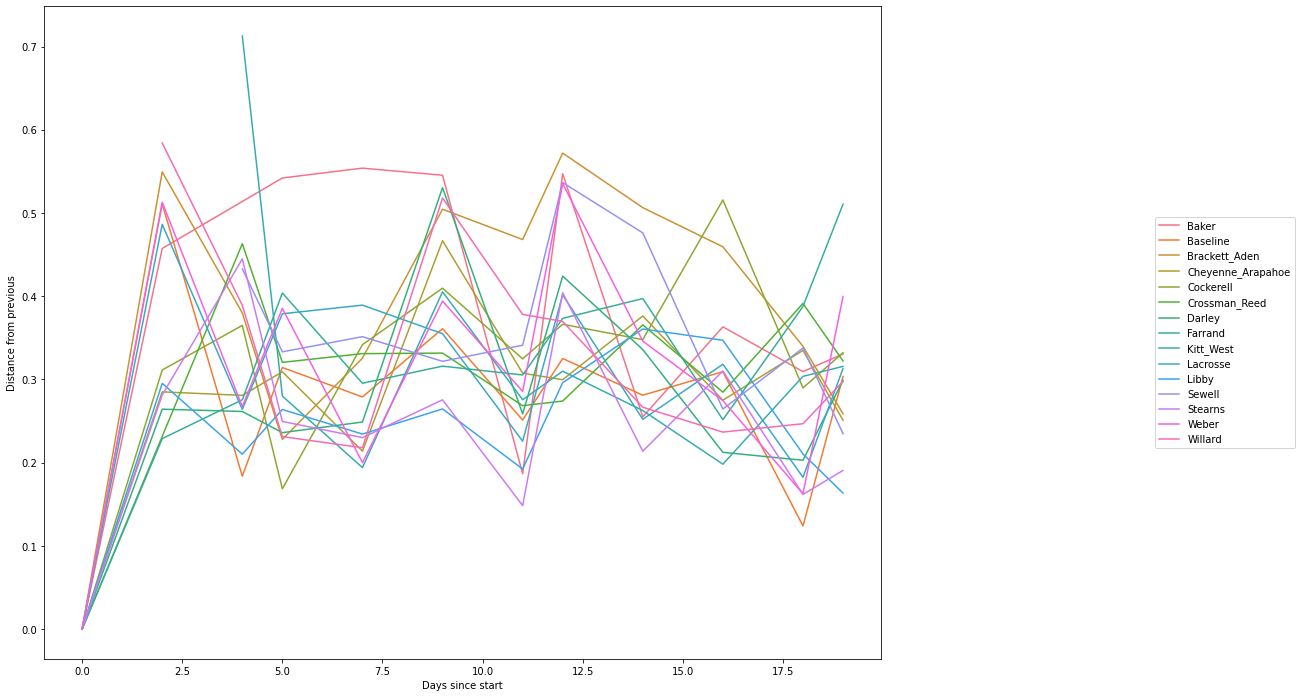

In [42]:
sns.lineplot(x='Days since start',
             y='Distance from previous',
             hue='Location',
             data=distprev_df)

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

Something weird is happening with that one that peaks up at day 4. I need to make sure all have a time point 0

In [43]:
have_a_day_zero = [x for x in new_metadata[new_metadata['DaysSince']==0]['Location']]
all_locations = [x for x in new_metadata['Location'].unique()]

for loc in all_locations:
  if loc not in have_a_day_zero:
    print(f'{loc} has no day zero')

Kitt_West has no day zero
Sewell has no day zero
Willard has no day zero


In [44]:
all_day_zeros = new_metadata[new_metadata['Location'].isin(['Kitt_West', 'Sewell', 'Willard'])==False]

In [45]:
dist_prev_df = dist_from_prev(all_day_zeros)

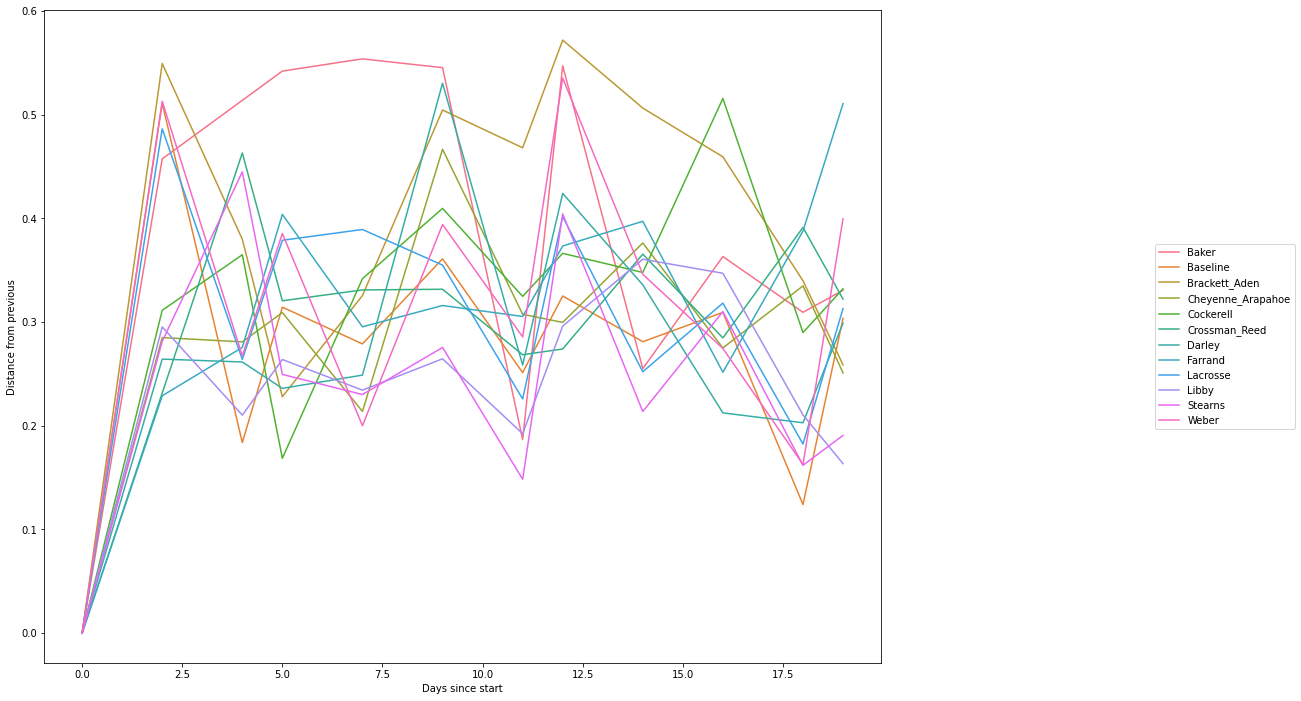

In [46]:
sns.lineplot(x='Days since start',
             y='Distance from previous',
             hue='Location',
             data=dist_prev_df)

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

## From day 0 

In [47]:
def dist_from_zero(metadata):
  distzero = []
  location = []
  dayssince = []
  index = []
  for num, row in enumerate(metadata.index):
    index.append(row)
    if metadata.loc[row]['DaysSince']==0:
      distzero.append(0)
      location.append(str(metadata.loc[row]['Location']))
      dayssince.append(metadata.loc[row]['DaysSince'])
      zero = row

    else:
      current = row 
      distzero.append(braycurt_df[current][zero])
      location.append(str(metadata.loc[current]['Location']))
      dayssince.append(metadata.loc[current]['DaysSince'])

  distzero_df = pd.DataFrame(data = [distzero,location,dayssince]).transpose()
  distzero_df.columns = ['Distance from first', 'Location', 'Days since start']
  distzero_df.index = index
  
  #For some reason, these are dtype object, and I can't quite figure out why, 
  #but I have to convert them to strings before converting to floats...
  
  distzero_df['Distance from first'] = distzero_df['Distance from first'].astype(str).astype(float)
  distzero_df['Days since start'] = distzero_df['Days since start'].astype(str).astype(float)
  
  return distzero_df

In [48]:
dist_from_zero_df = dist_from_zero(all_day_zeros)

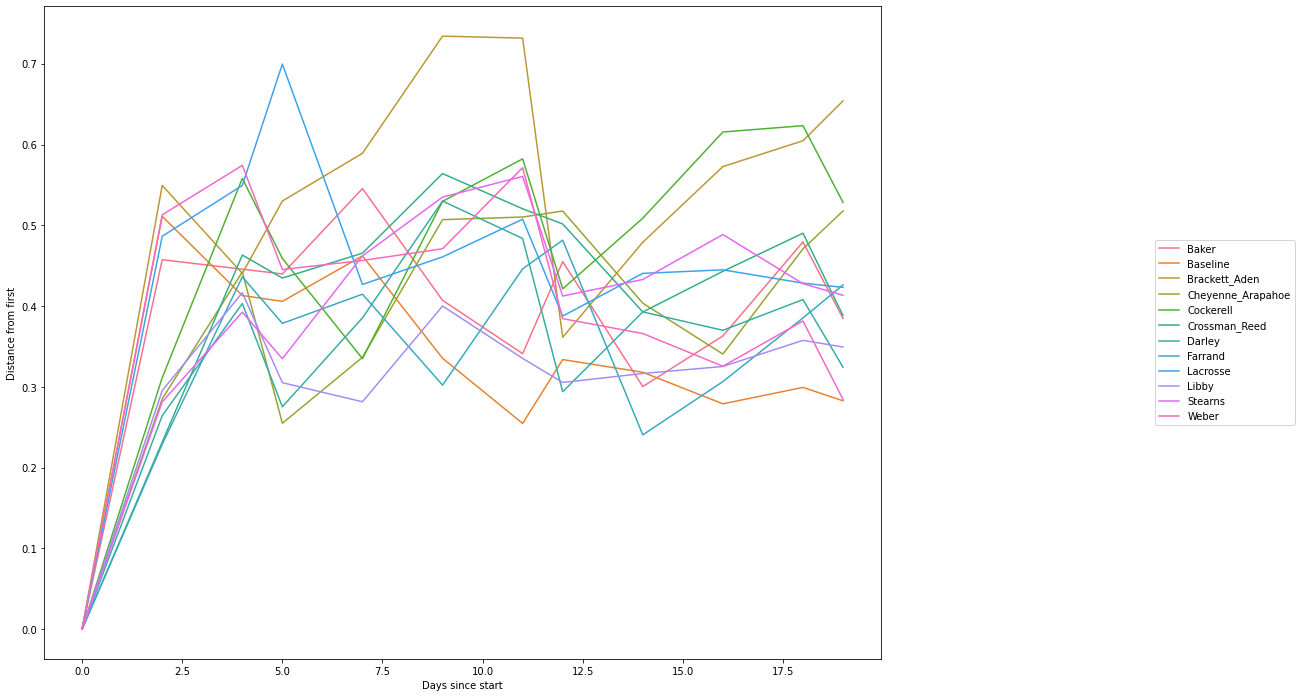

In [49]:
sns.lineplot(x='Days since start',
             y='Distance from first',
             hue='Location',
             data=dist_from_zero_df)

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

## Average dist from previous timepoint

In [50]:
avg_prev_dists = dist_prev_df.groupby(by='Days since start').mean()

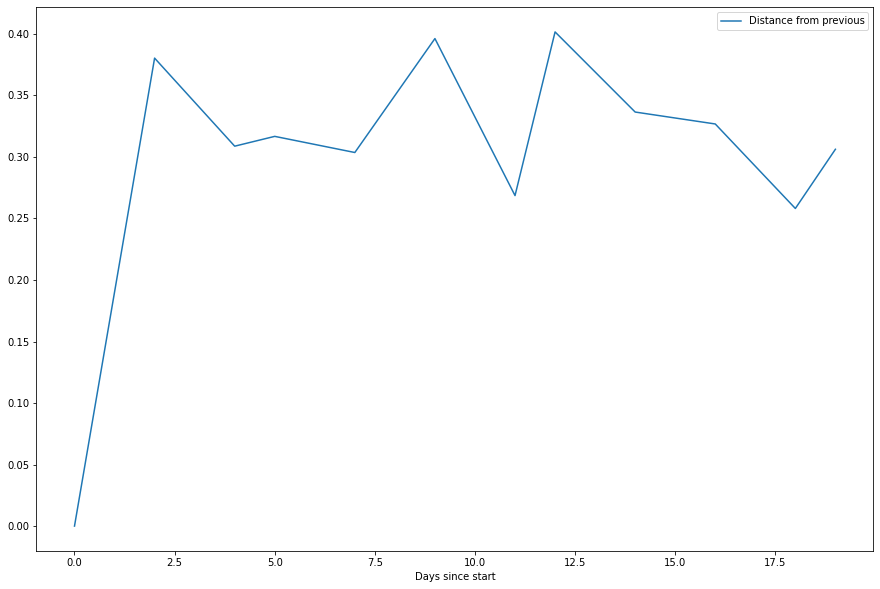

In [51]:
avg_prev_dists.plot()
fig = plt.gcf()
fig.set_size_inches(15,10)

## Average dist from day 0  

In [52]:
avg_dist_zero = dist_from_zero_df.groupby(by='Days since start').mean()

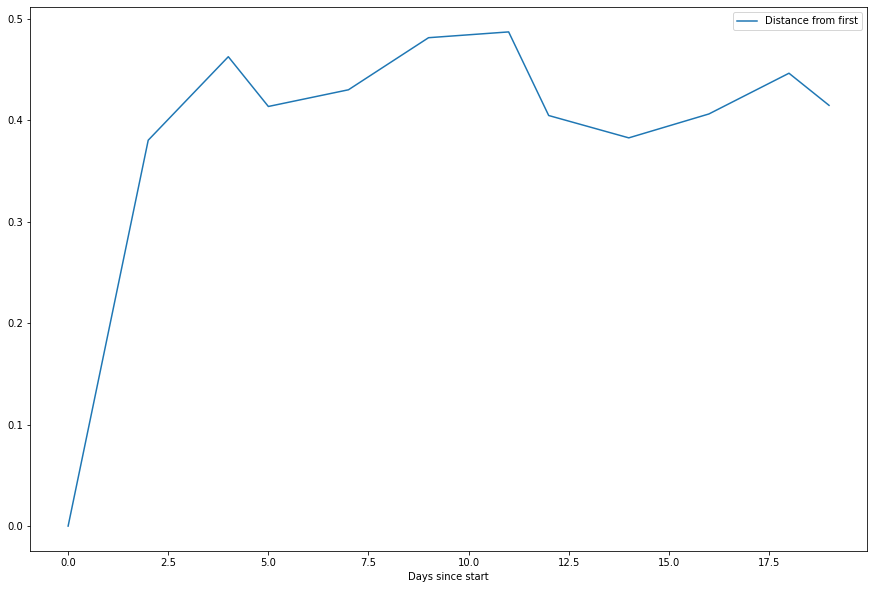

In [53]:
avg_dist_zero.plot()
fig = plt.gcf()
fig.set_size_inches(15,10)

In [54]:
avgs = avg_dist_zero.join(avg_prev_dists['Distance from previous'])

In [55]:
avgs_w_precip = avgs.join(baker.groupby('DaysSince').mean()['Precip']).reset_index()

In [56]:
melted = avgs_w_precip.melt(id_vars='Days since start')

In [57]:
melted.head()

,Days since start,variable,value
0,0.0,Distance from first,0.000000
1,2.0,Distance from first,0.380330
2,4.0,Distance from first,0.462626
3,5.0,Distance from first,0.413584
4,7.0,Distance from first,0.430039


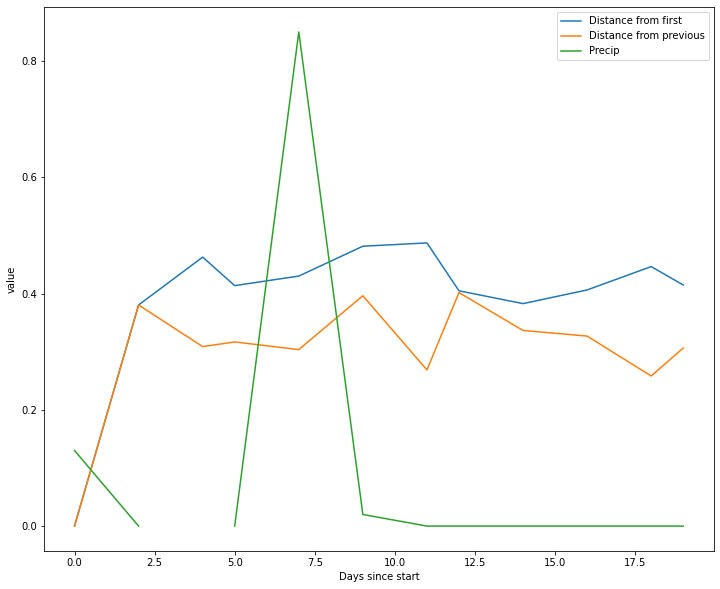

In [58]:
sns.lineplot(x='Days since start',
             y='value',
             hue='variable',
             data=melted)
plt.legend(title='')
fig = plt.gcf()
fig.set_size_inches(12,10)

## Dist from average community

In [59]:
data_notax.head()

SampleID,NTU_1,NTU_2,NTU_4,NTU_11,NTU_14,NTU_61,NTU_8,NTU_13,NTU_5,NTU_3,NTU_18,NTU_22,NTU_53,NTU_10,NTU_32,NTU_16,NTU_6,NTU_35,NTU_28,NTU_100,NTU_102,NTU_109,NTU_25,NTU_9,NTU_86,NTU_23,NTU_17,NTU_29,NTU_742,NTU_24,NTU_967,NTU_7,NTU_69,NTU_19,NTU_36,NTU_15,NTU_48,NTU_41,NTU_20,NTU_44,...,NTU_2381,NTU_1457,NTU_931,NTU_1573,NTU_1324,NTU_662,NTU_282,NTU_1586,NTU_892,NTU_1902,NTU_1179,NTU_890,NTU_676,NTU_1129,NTU_911,NTU_1183,NTU_1403,NTU_1063,NTU_1266,NTU_1170,NTU_1498,NTU_1685,NTU_1176,NTU_1201,NTU_1327,NTU_502,NTU_935,NTU_1147,NTU_1414,NTU_660,NTU_1189,NTU_1230,NTU_2275,NTU_1081,NTU_1140,NTU_702,NTU_1842,NTU_1123,NTU_1161,NTU_1557
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAK_1,0.127758982,0.064282262,0.0353633,0.021185758,0.019896891,0.002577735,0.031093926,0.020541324,0.034557757,0.041002094,0.013855325,0.01127759,0.003383277,0.023602384,0.007410988,0.015627517,0.034557757,0.006686,0.008860963,0.001127759,0.001047205,0.000966651,0.009827614,0.024005155,0.001449976,0.010149831,0.01433865,0.008780409,0,0.009908168,0,0.033027227,0.002416626,0.013694216,0.006363783,0.017238602,0.003786048,0.005638795,0.012969228,0.004913807,...,0,0,0,0,0,0,0.000161108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_10,0.06460396,0.09269802,0.036757426,0.009529703,0.073019802,0.094925743,0.022029703,0.053217822,0.013118812,0.011138614,0.00730198,0.006559406,0.036881188,0.004207921,0.008415842,0.031188119,0.021163366,0.004579208,0.004826733,0.005816832,0.009034653,0.002227723,0.008168317,0.016707921,0.002722772,0.00990099,0.015965347,0.015717822,0,0.004826733,0,0.004950495,0.001732673,0.005569307,0.003217822,0.006930693,0.007920792,0.004084158,0.00470297,0.002722772,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000123762,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BAK_12,0.077020639,0.065951804,0.02911334,0.00334371,0.060302087,0.076040586,0.014008993,0.043064684,0.018390407,0.00980053,0.004266113,0.004900265,0.026864983,0.005880318,0.006053269,0.05494062,0.023060071,0.004554364,0.004323763,0.002248357,0.008301626,0.000691802,0.008993428,0.026576732,0.004266113,0.008532226,0.017352704,0.010895884,0,0.005130866,0,0.013836043,0.002940159,0.017468004,0.004208463,0.008820477,0.008705177,0.004208463,0.008762827,0.003516661,...,0,0,0,0,0,5.76502E-05,0,0,0,0,0,0,5.76502E-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.76502E-05,0,0,0,0,0,5.76502E-05,0,0,0,0
BAK_13,0.058266972,0.125601198,0.035953639,0.0293306,0.000788457,0.018765276,0.009855712,0.018765276,0.097295593,0.118268548,0.032878656,0.025782544,0.002365371,0.062603485,0.004494205,0.000709611,0.010565324,0.003153828,0.023338327,0,0.004651896,0.000473074,0.05188047,0.003626902,0.000236537,0.001971142,0.003153828,0.011984546,7.88457E-05,0.013324923,0,0.003548056,0.000315383,0.001340377,0.008594181,0.005913427,0.004415359,0.009698021,0.002365371,0.004021131,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000157691,0,0,0,0
BAK_15,0.080519829,0.102224009,0.065648446,0.008038585,0.008038585,0.005359057,0.016747053,0.015139335,0.055332262,0.100348339,0.027063237,0.015273312,0.005493033,0.048499464,0.008306538,0.004153269,0.021168274,0.005894962,0.017416935,0.000401929,0,0.000937835,0.030144695,0.014067524,0.007368703,0.00710075,0.008172562,0.012593783,0,0.009914255,0,0.01085209,0.000669882,0.007904609,0.007636656,0.012057878,0.003349411,0.007770632,0.009512326,0.004287245,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000133976,0,0,0,0


In [60]:
data_notax.shape[0]

173

In [61]:
data_notax = data_notax.astype(str).astype(float)

In [62]:
data_notax.mean(axis=0)

SampleID
NTU_1       0.091596
NTU_2       0.088081
NTU_4       0.071817
NTU_11      0.070798
NTU_14      0.062254
              ...   
NTU_702     0.000082
NTU_1842    0.000006
NTU_1123    0.000047
NTU_1161    0.000020
NTU_1557    0.000012
Length: 1087, dtype: float64

In [63]:
data_notax.loc['Dummy'] = data_notax.mean(axis=0)

In [64]:
data_notax.loc['Dummy']

SampleID
NTU_1       0.091596
NTU_2       0.088081
NTU_4       0.071817
NTU_11      0.070798
NTU_14      0.062254
              ...   
NTU_702     0.000082
NTU_1842    0.000006
NTU_1123    0.000047
NTU_1161    0.000020
NTU_1557    0.000012
Name: Dummy, Length: 1087, dtype: float64

In [65]:
dummy_dm = diversity.beta_diversity('braycurtis', counts=data_notax, ids=data_notax.index)

In [66]:
dummy_df = dummy_dm.to_data_frame()

In [67]:
distdummy= []
location = []
dayssince = []
for row in metadata.index:
  distdummy.append(dummy_df[row]['Dummy'])
  location.append(metadata.loc[row]['Location'])
  dayssince.append(metadata.loc[row]['DaysSince'])

distdummy_df = pd.DataFrame(data = [distdummy,location,dayssince]).transpose()
distdummy_df.columns = ['Distance from average community', 'Location', 'Days Since']
distdummy_df['Distance from average community'] = distdummy_df['Distance from average community'].astype(str).astype(float)
distdummy_df['Days Since'] = distdummy_df['Days Since'].astype(str).astype(float)
distdummy_df['Location'] = distdummy_df['Location'].astype(str)
distdummy_df.index = metadata.index

In [68]:
distdummy_df.head()

,Distance from average community,Location,Days Since
SampleID,,,
BAK_1,0.381526,Baker,0.0
BAK_10,0.315503,Baker,9.0
BAK_12,0.343412,Baker,11.0
BAK_13,0.464521,Baker,12.0
BAK_15,0.391341,Baker,14.0


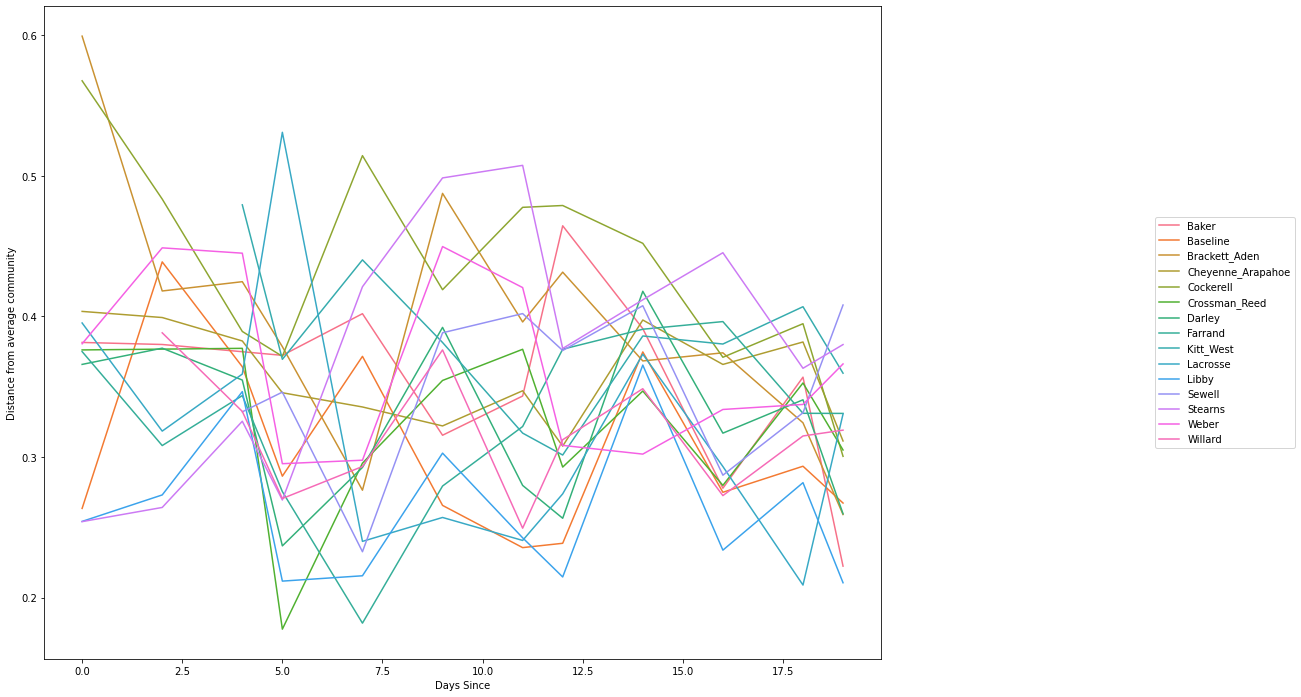

In [69]:
sns.lineplot(x='Days Since',
             y='Distance from average community',
             hue='Location',
             data=distdummy_df)

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

No handles with labels found to put in legend.


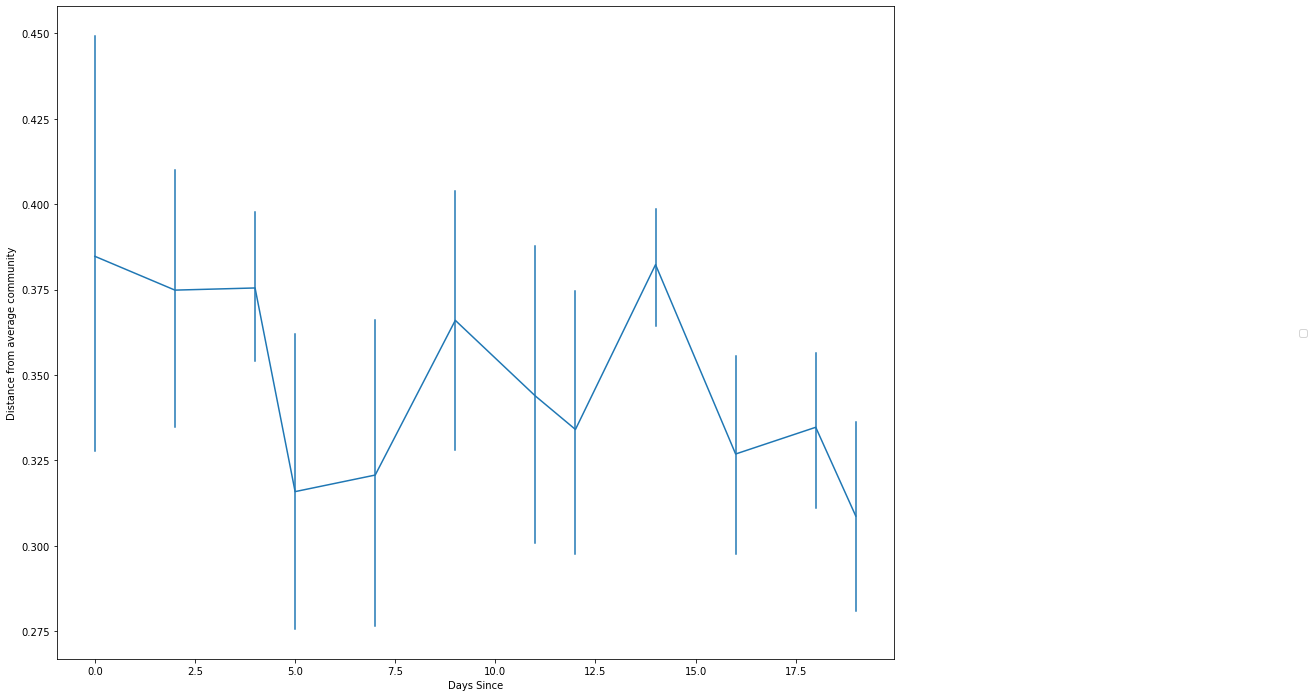

In [70]:
sns.lineplot(x='Days Since',
             y='Distance from average community',
             data=distdummy_df,
             err_style='bars')

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

## Putting it all together

In [71]:
dist_from_zero_df.head()

,Distance from first,Location,Days since start
BAK_1,0.000000,Baker,0.0
BAK_3,0.457402,Baker,2.0
BAK_6,0.439809,Baker,5.0
BAK_8,0.545433,Baker,7.0
BAK_10,0.407111,Baker,9.0


In [72]:
dist_prev_df.head()

,Distance from previous,Location,Days since start
BAK_1,0.000000,Baker,0.0
BAK_3,0.457402,Baker,2.0
BAK_6,0.542088,Baker,5.0
BAK_8,0.553894,Baker,7.0
BAK_10,0.545386,Baker,9.0


In [73]:
alldists = pd.concat([distdummy_df, dist_from_zero_df['Distance from first'], dist_prev_df['Distance from previous'], metadata['Precip']], axis=1)

In [74]:
alldists.head(20)

,Distance from average community,Location,Days Since,Distance from first,Distance from previous,Precip
BAK_1,0.381526,Baker,0.0,0.000000,0.000000,0.13
BAK_10,0.315503,Baker,9.0,0.407111,0.545386,0.02
BAK_12,0.343412,Baker,11.0,0.341110,0.186696,0.00
BAK_13,0.464521,Baker,12.0,0.455063,0.547214,0.00
BAK_15,0.391341,Baker,14.0,0.300381,0.255094,0.00
BAK_17,0.277824,Baker,16.0,0.362968,0.363214,0.00
BAK_19,0.356827,Baker,18.0,0.479392,0.309436,0.00
BAK_20,0.222372,Baker,19.0,0.384711,0.330702,0.00
BAK_3,0.380069,Baker,2.0,0.457402,0.457402,0.00
BAK_6,0.372350,Baker,5.0,0.439809,0.542088,0.00


In [75]:
melted_alldists = pd.melt(alldists, id_vars=['Location','Days Since'])

In [76]:
melted_alldists.head()

,Location,Days Since,variable,value
0,Baker,0.0,Distance from average community,0.381526
1,Baker,9.0,Distance from average community,0.315503
2,Baker,11.0,Distance from average community,0.343412
3,Baker,12.0,Distance from average community,0.464521
4,Baker,14.0,Distance from average community,0.391341


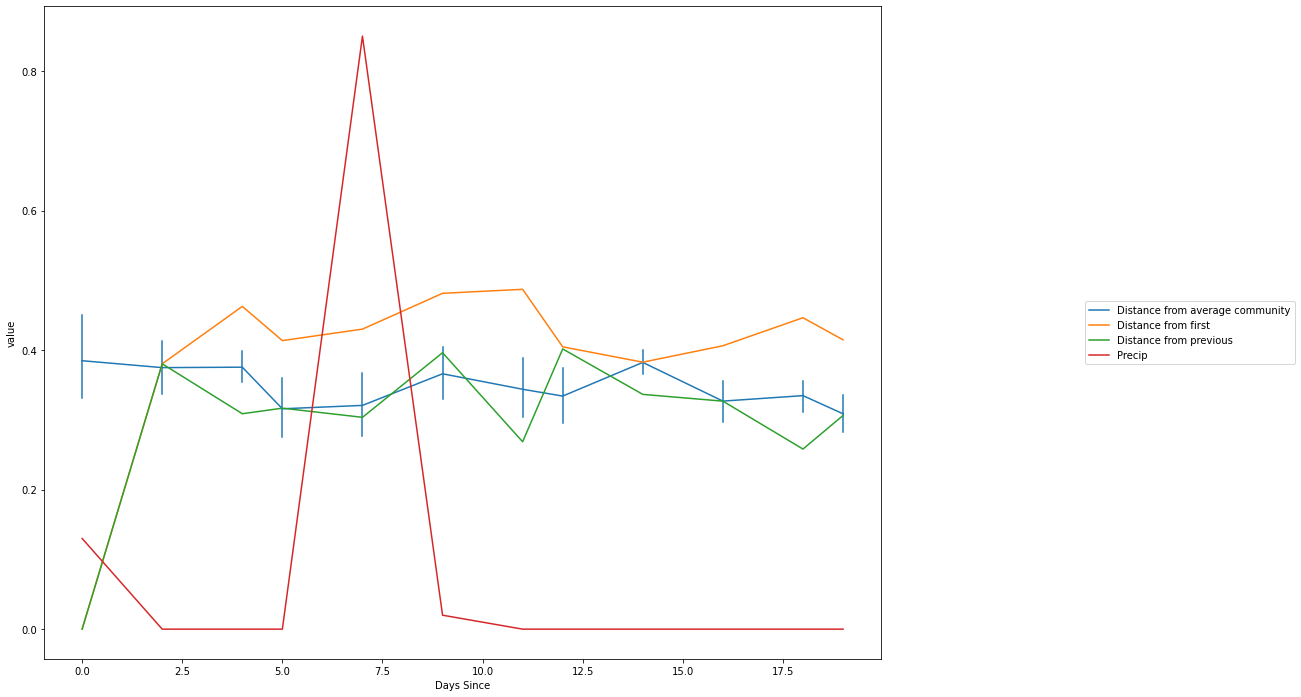

In [77]:
sns.lineplot(x='Days Since',
             y ='value',
             hue='variable',
             data=melted_alldists,
             err_style ='bars')
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

In [78]:
melted_noprecip = melted_alldists = pd.melt(alldists.drop('Precip',axis=1),
                                            id_vars=['Location','Days Since'])

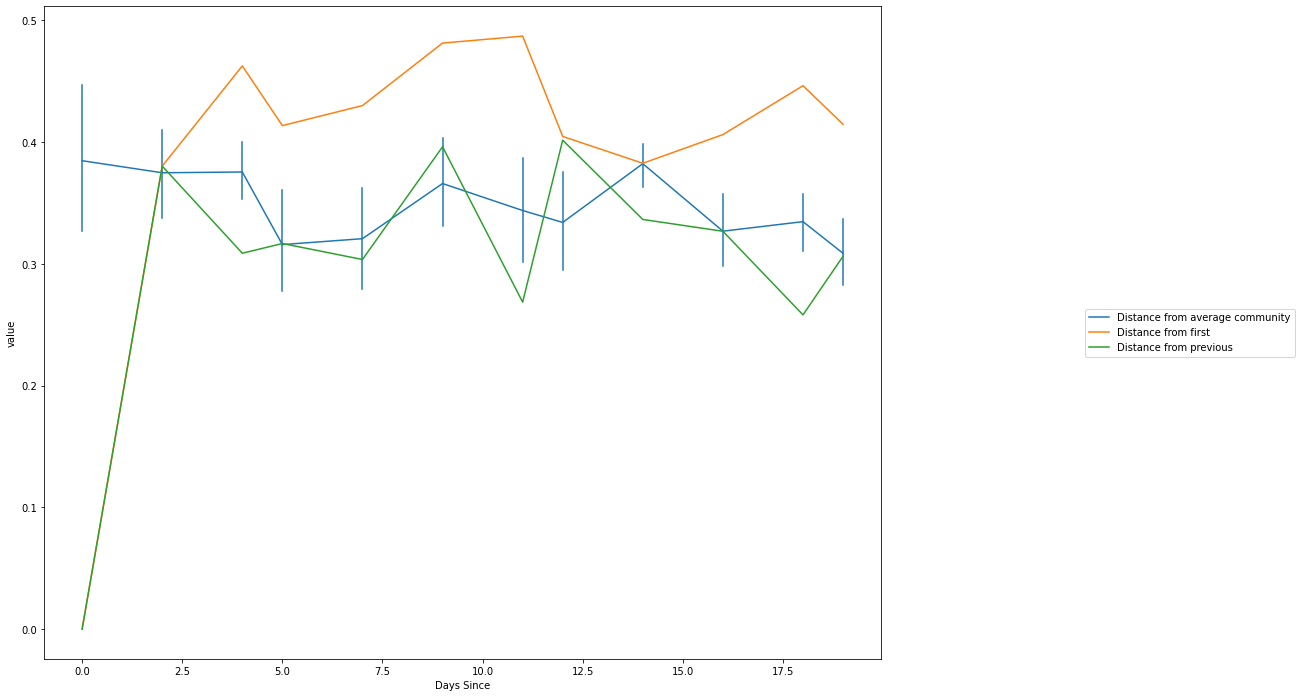

In [79]:
sns.lineplot(x='Days Since',
             y ='value',
             hue='variable',
             data=melted_noprecip,
             estimator='mean',
             err_style ='bars')
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

Exported these so Will could use them - commented out so I don't export the data again.

In [80]:
#alldists.to_csv('alldists.csv')

In [81]:
#melted_alldists.to_csv('melted_alldists.csv')

# Distance from dummy community for each site

Noah suggested this could be more useful than one average community.

In [82]:
df = pd.DataFrame()

for location in metadata['Location'].unique():
  subset_metadata = metadata[metadata['Location']==location]
  subset_data = data_notax.loc[subset_metadata.index]
  subset_data.loc[f'{location}_avg'] = subset_data.mean(axis=0) 

  df = pd.concat([df, subset_data])

You can see below that we now have dummy for the individual sites

In [83]:
df.iloc[:25,:10]

SampleID,NTU_1,NTU_2,NTU_4,NTU_11,NTU_14,NTU_61,NTU_8,NTU_13,NTU_5,NTU_3
SampleID,,,,,,,,,,
BAK_1,0.127759,0.064282,0.035363,0.021186,0.019897,0.002578,0.031094,0.020541,0.034558,0.041002
BAK_10,0.064604,0.092698,0.036757,0.009530,0.073020,0.094926,0.022030,0.053218,0.013119,0.011139
BAK_12,0.077021,0.065952,0.029113,0.003344,0.060302,0.076041,0.014009,0.043065,0.018390,0.009801
BAK_13,0.058267,0.125601,0.035954,0.029331,0.000788,0.018765,0.009856,0.018765,0.097296,0.118269
BAK_15,0.080520,0.102224,0.065648,0.008039,0.008039,0.005359,0.016747,0.015139,0.055332,0.100348
BAK_17,0.086337,0.070959,0.172994,0.008329,0.082332,0.020663,0.033477,0.047733,0.024027,0.015057
BAK_19,0.059213,0.051550,0.065134,0.002438,0.092999,0.014977,0.053292,0.090561,0.020202,0.017416
BAK_20,0.080319,0.106328,0.102482,0.015936,0.056232,0.071710,0.032237,0.067680,0.027475,0.013829
BAK_3,0.088166,0.027875,0.108340,0.001322,0.199552,0.009253,0.027933,0.043968,0.038853,0.050980


In [84]:
site_dummies_bc_dm = diversity.beta_diversity('braycurtis',
                                              df,
                                              ids=df.index)
site_dummies_bc_df = site_dummies_bc_dm.to_data_frame()

In [85]:
site_dummies_bc_df.head()

,BAK_1,BAK_10,BAK_12,BAK_13,BAK_15,BAK_17,BAK_19,BAK_20,BAK_3,BAK_6,BAK_8,Baker_avg,BAS_1,BAS_10,BAS_12,BAS_13,BAS_15,BAS_17,BAS_19,BAS_20,BAS_3,BAS_5,BAS_6,BAS_8,Baseline_avg,BRA_1,BRA_10,BRA_12,BRA_13,BRA_15,BRA_17,BRA_19,BRA_20,BRA_3,BRA_5,BRA_6,BRA_8,Brackett_Aden_avg,CHE_1,CHE_10,...,SEW_8,Sewell_avg,STE_1,STE_10,STE_12,STE_13,STE_15,STE_17,STE_19,STE_20,STE_3,STE_5,STE_6,STE_8,Stearns_avg,WEB_1,WEB_10,WEB_12,WEB_13,WEB_15,WEB_17,WEB_19,WEB_20,WEB_3,WEB_5,WEB_6,WEB_8,Weber_avg,WIL_10,WIL_12,WIL_13,WIL_15,WIL_17,WIL_19,WIL_20,WIL_3,WIL_5,WIL_6,WIL_8,Willard_avg
BAK_1,0.000000,0.407111,0.341110,0.455063,0.300381,0.362968,0.479392,0.384711,0.457402,0.439809,0.545433,0.294771,0.429931,0.528565,0.455529,0.475913,0.453534,0.495222,0.509197,0.418251,0.663258,0.586920,0.505540,0.631647,0.481845,0.650140,0.545218,0.374385,0.606083,0.422815,0.586207,0.508202,0.451054,0.550958,0.623253,0.622672,0.475709,0.454173,0.445717,0.373194,...,0.451573,0.405406,0.416228,0.581428,0.608256,0.402173,0.406613,0.486379,0.457216,0.393887,0.397127,0.485583,0.408229,0.512184,0.398888,0.476160,0.594279,0.607914,0.477300,0.518552,0.546028,0.542841,0.470203,0.640467,0.664877,0.514040,0.560599,0.506014,0.476487,0.453799,0.445904,0.402789,0.357910,0.452371,0.468819,0.535074,0.489818,0.466368,0.464068,0.399024
BAK_10,0.407111,0.000000,0.186696,0.518187,0.423194,0.316260,0.393836,0.242089,0.488889,0.230865,0.545386,0.245109,0.436037,0.292144,0.331473,0.482339,0.535060,0.427422,0.407602,0.464188,0.540766,0.474314,0.480849,0.507613,0.389756,0.718514,0.371020,0.376738,0.492330,0.527333,0.499413,0.349585,0.274651,0.587528,0.533051,0.487825,0.407786,0.353771,0.532611,0.221816,...,0.435881,0.443143,0.363010,0.374218,0.373919,0.305798,0.365081,0.309754,0.269675,0.294517,0.424328,0.354186,0.287192,0.366624,0.248552,0.530353,0.409255,0.379806,0.459093,0.473334,0.425107,0.440104,0.536031,0.563015,0.526771,0.469229,0.468915,0.413646,0.257045,0.391326,0.456049,0.521021,0.407851,0.421206,0.433081,0.560911,0.520999,0.396255,0.517412,0.382978
BAK_12,0.341110,0.186696,0.000000,0.547214,0.410191,0.328624,0.440139,0.275147,0.501852,0.277325,0.579595,0.257837,0.437093,0.392894,0.371194,0.519220,0.551403,0.486606,0.468444,0.488498,0.580757,0.506977,0.515344,0.549467,0.442059,0.717248,0.381664,0.377839,0.531712,0.546437,0.536034,0.391367,0.278668,0.621253,0.565382,0.527142,0.436674,0.375951,0.541593,0.238200,...,0.448796,0.455619,0.389166,0.383331,0.397297,0.329744,0.359985,0.312824,0.294994,0.296044,0.459433,0.384024,0.323637,0.394120,0.266652,0.550243,0.453850,0.445368,0.509588,0.518893,0.478849,0.489905,0.573488,0.604798,0.567878,0.513984,0.496309,0.453911,0.296262,0.415687,0.486347,0.541515,0.426509,0.466876,0.458535,0.581493,0.546228,0.425329,0.541497,0.402938
BAK_13,0.455063,0.518187,0.547214,0.000000,0.255094,0.502857,0.544984,0.461719,0.492587,0.529534,0.504346,0.401528,0.514928,0.575796,0.508282,0.473726,0.528392,0.529352,0.526622,0.434525,0.703436,0.634195,0.523752,0.659947,0.507634,0.622258,0.650612,0.510079,0.644832,0.347758,0.660570,0.612434,0.588152,0.515417,0.646243,0.645507,0.581561,0.527378,0.319585,0.583767,...,0.529897,0.512819,0.539197,0.700034,0.721767,0.567100,0.622222,0.671775,0.604630,0.579610,0.488742,0.632092,0.565672,0.618627,0.570735,0.515719,0.683706,0.686110,0.433687,0.531602,0.602811,0.597146,0.427274,0.685315,0.701887,0.500561,0.579821,0.555539,0.631358,0.571790,0.530135,0.453672,0.514355,0.562330,0.537575,0.645872,0.550765,0.501603,0.497222,0.507424
BAK_15,0.300381,0.423194,0.410191,0.255094,0.000000,0.363214,0.485854,0.364916,0.425937,0.499613,0.498500,0.284845,0.445321,0.548563,0.485643,0.462496,0.501220,0.508688,0.517392,0.428496,0.674022,0.600408,0.499459,0.639307,0.470231,0.642063,0.598240,0.414430,0.629859,0.339367,0.610276,0.570837,0.496291,0.515928,0.623244,0.631498,0.544265,0.486696,0.303697,0.479155,...,0.490889,0.463266,0.452573,0.630336,0.653575,0.456412,0.481812,0.559007,0.506239,0.449313,0.434136,0.556766,0.503859,0.562634,0.476976

In [86]:
dist_site_dummy = pd.DataFrame(columns=['Distance from site average'])

for sample in metadata.index:
  dist_site_dummy.loc[sample] = site_dummies_bc_df.loc[sample, f'{location}_avg']

In [87]:
dist_site_dummy.head(15)

,Distance from site average
BAK_1,0.399024
BAK_10,0.382978
BAK_12,0.402938
BAK_13,0.507424
BAK_15,0.444256
BAK_17,0.292268
BAK_19,0.374182
BAK_20,0.277386
BAK_3,0.385975
BAK_6,0.422053


In [88]:
trial_alldists = pd.concat([alldists, dist_site_dummy],axis=1)

In [89]:
trial_alldists.head()

,Distance from average community,Location,Days Since,Distance from first,Distance from previous,Precip,Distance from site average
BAK_1,0.381526,Baker,0.0,0.000000,0.000000,0.13,0.399024
BAK_10,0.315503,Baker,9.0,0.407111,0.545386,0.02,0.382978
BAK_12,0.343412,Baker,11.0,0.341110,0.186696,0.00,0.402938
BAK_13,0.464521,Baker,12.0,0.455063,0.547214,0.00,0.507424
BAK_15,0.391341,Baker,14.0,0.300381,0.255094,0.00,0.444256


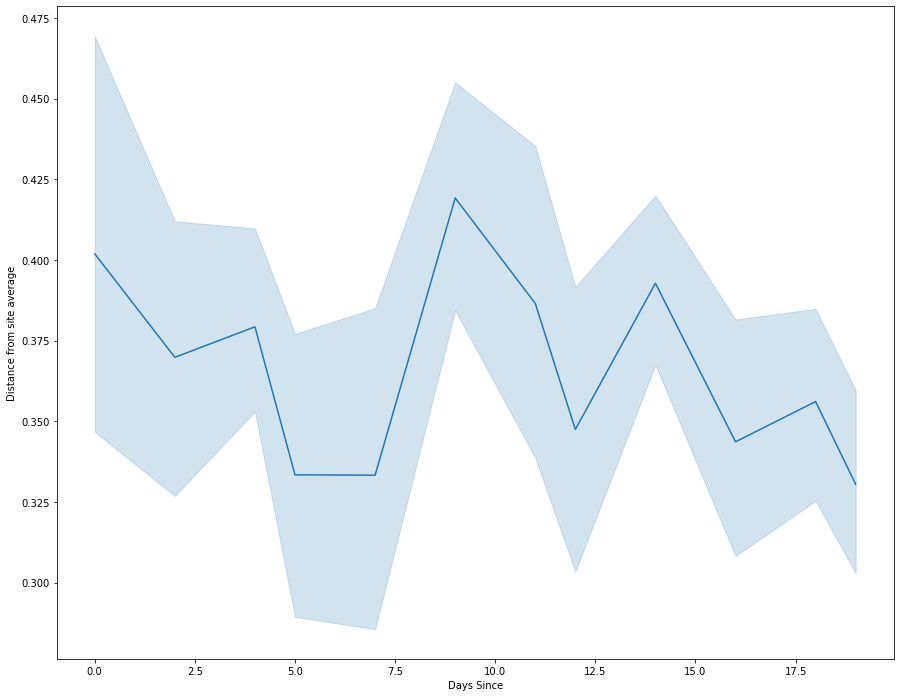

In [90]:
sns.lineplot(x='Days Since',
             y='Distance from site average',
             data= trial_alldists)

fig = plt.gcf()
fig.set_size_inches(15,12)

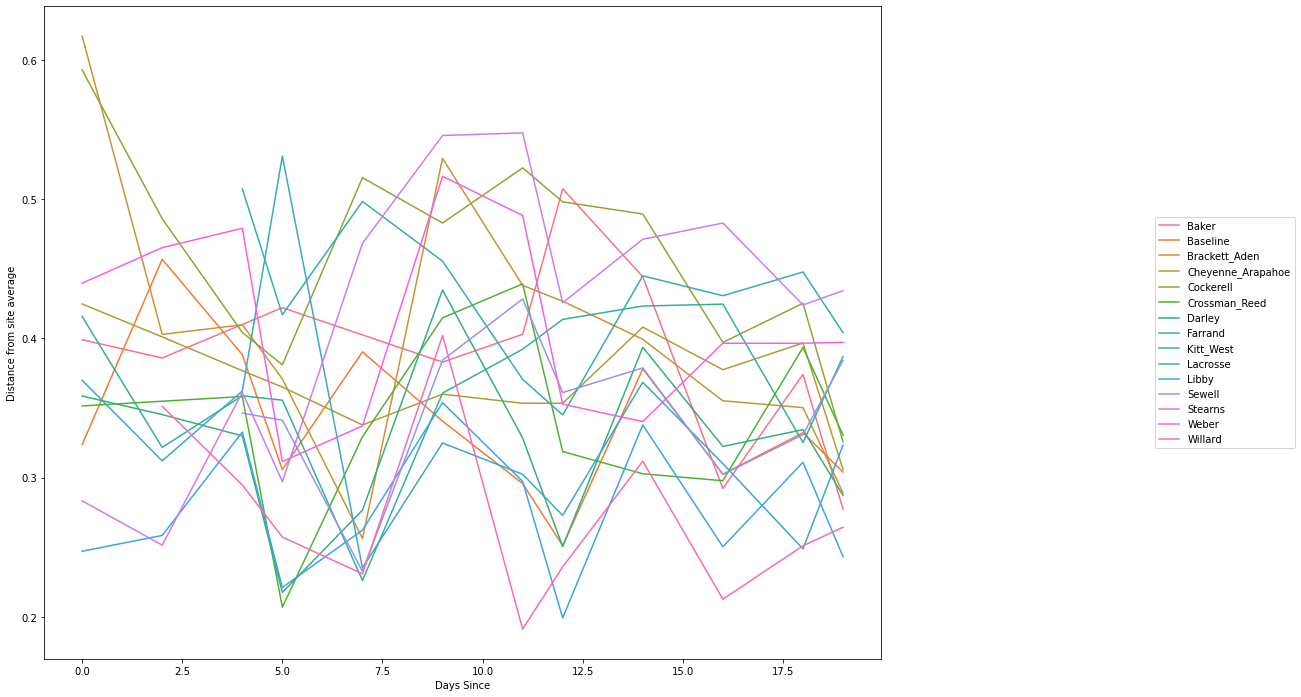

In [91]:
sns.lineplot(x='Days Since',
             y='Distance from site average',
             hue= 'Location',
             err_style='bars',
             data= trial_alldists)
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

In [92]:
melted_trialalldists = pd.melt(trial_alldists, id_vars=['Location','Days Since'])

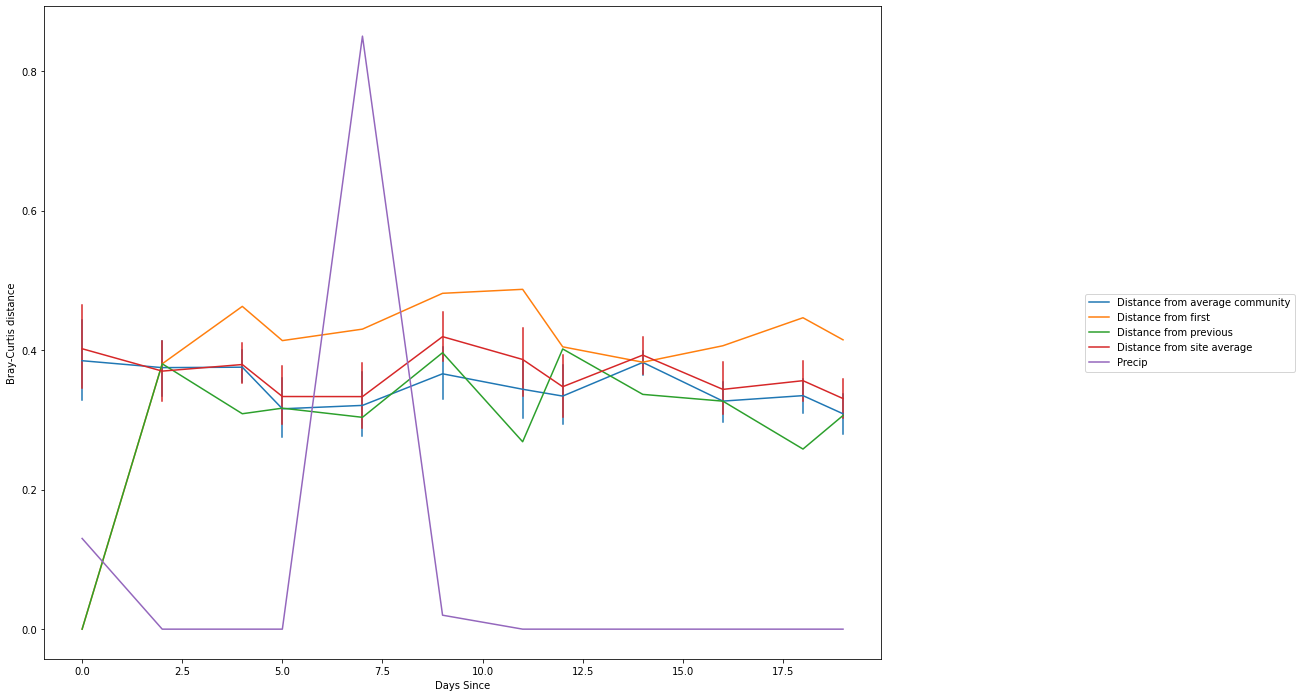

In [93]:
ax = sns.lineplot(x='Days Since',
                  y='value',
                  hue='variable',
                  data=melted_trialalldists,
                  hue_order=['Distance from average community', 'Distance from first', 
                             'Distance from previous', 'Distance from site average', 'Precip'], 
                  err_style='bars')

ax.set_ylabel('Bray-Curtis distance')
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)


#Which are most volatile?

In [94]:
alldists2 = trial_alldists 

In [95]:
alldists2.head()

,Distance from average community,Location,Days Since,Distance from first,Distance from previous,Precip,Distance from site average
BAK_1,0.381526,Baker,0.0,0.000000,0.000000,0.13,0.399024
BAK_10,0.315503,Baker,9.0,0.407111,0.545386,0.02,0.382978
BAK_12,0.343412,Baker,11.0,0.341110,0.186696,0.00,0.402938
BAK_13,0.464521,Baker,12.0,0.455063,0.547214,0.00,0.507424
BAK_15,0.391341,Baker,14.0,0.300381,0.255094,0.00,0.444256


In [96]:
cols = ['Distance from average community','Distance from first', 
        'Distance from previous', 'Distance from site average']

avgdists = pd.DataFrame(columns=cols)
for location in alldists2['Location'].unique():
  subset = alldists2[alldists2['Location']==location]
  for col in cols:
    avgdists.loc[location, col] = subset[col].mean(axis=0)

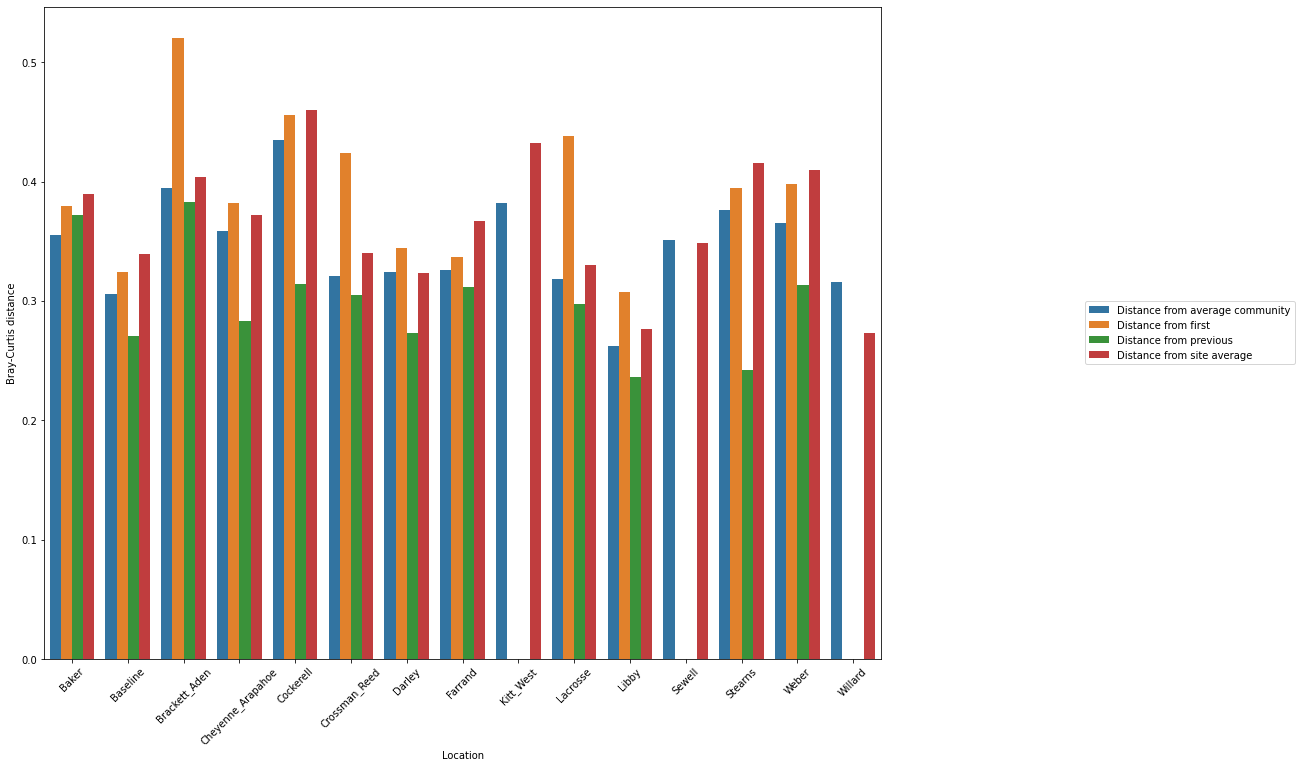

In [112]:
ax = sns.barplot(x='index',
            y='value',
            data=pd.melt(avgdists.reset_index(), id_vars=['index']), 
            hue='variable')

ax.set_ylabel('Bray-Curtis distance')
ax.set_xlabel('Location')
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)
